In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

## Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","logPrice"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Micromax,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,0
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

In [4]:
data = data.drop(brand_columns,axis=1)

In [5]:
data.head()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Compass Sensor,Proximity Sensor,Magnetic Sensor,Gravity Sensor,Heathtracking Sensor,Gyroscope Sensor,Accelerometar Sensor,Vibration Sensor,Laser Sensor,Manufacturer
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,1,1,0,0,0,1,1,0,0,11
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0


Овие знаеме дека треба да ги тргнеме од визуелизациите

In [6]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 49


Визуелизации за тергет варијаблата 

16:		84
15:		69
13:		59
12:		49
0:		49
11:		26
9:		13
6:		6
7:		5
10:		5
14:		4
4:		2
3:		2
8:		2
5:		1
1:		1
2:		1


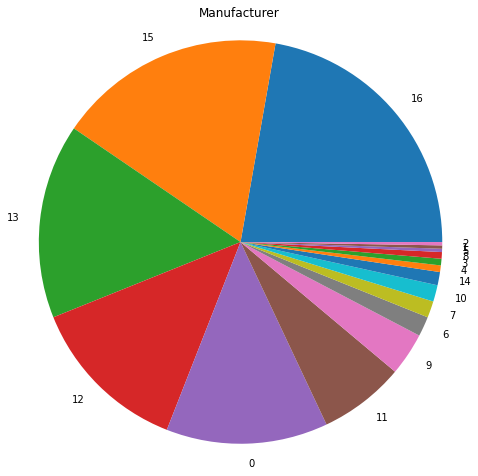

In [7]:
counts = data['Manufacturer'].value_counts()
counts_dict = counts.to_dict()

for key,value in counts_dict.items():
    print(str(key) + ":\t\t" + str(value))

plt.figure(figsize=(8,8))
patches, texts = plt.pie(list(counts_dict.values()),labels=list(counts_dict.keys()))
plt.axis('equal')
plt.title("Manufacturer")
plt.show()

Ги тргаме помалку застапените класи бидејќи немаме доволно податоци за тренирање на нив. Можда пробај да ги ставиш у посебна категорија other 

In [8]:
n = data.shape[0]
data = data.loc[data['Manufacturer'].isin(counts.index[counts > 10])]
print("Removed " + str(n-data.shape[0]) + " records")
print("Updated number of records = " + str(data.shape[0]))

Removed 29 records
Updated number of records = 349


In [9]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

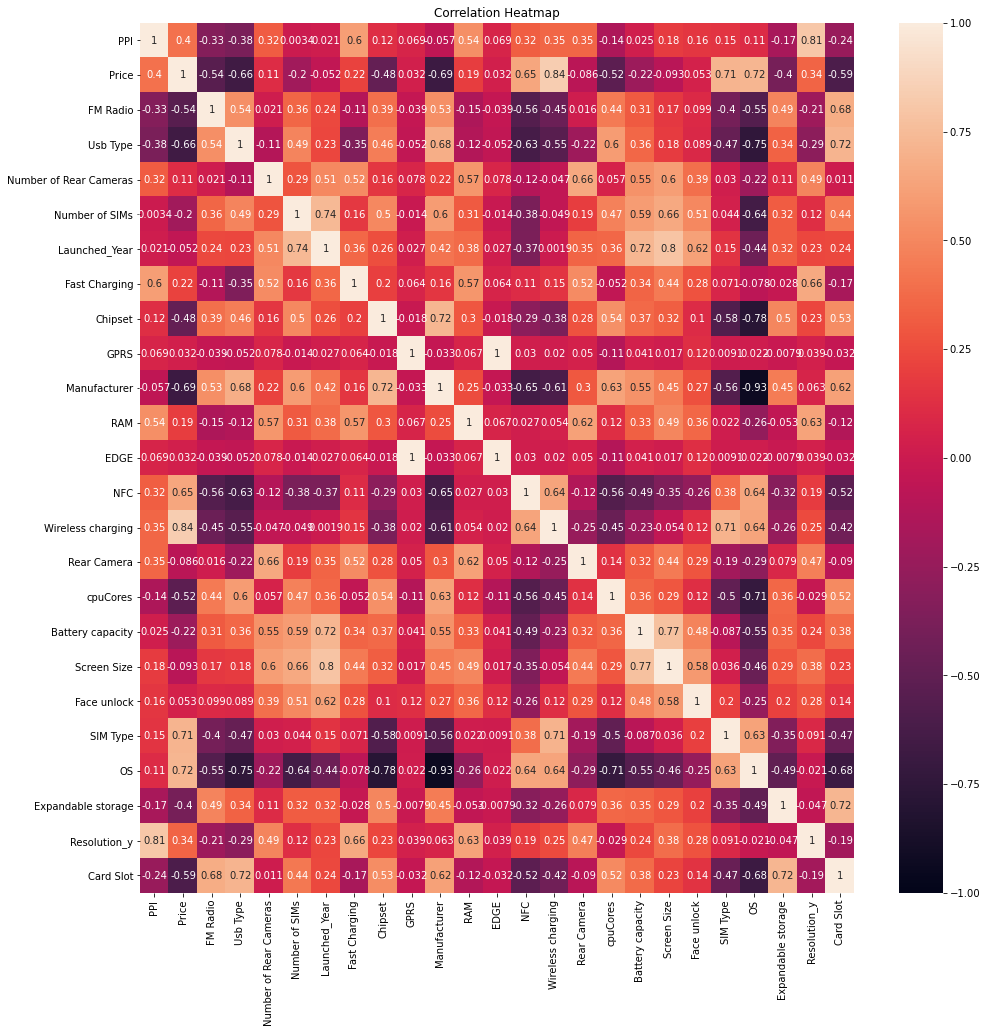

In [10]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})
plt.show()

In [11]:
to_remove = ['EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 1 features
Updated number of features = 48


## Класификација

In [12]:
features = [x for x in data.columns if x != 'Manufacturer']
print(features)

['Battery capacity', 'Screen Size', 'Touchscreen', 'Internal storage', 'Headphones', 'Face unlock', 'Fingerprint sensor', 'Wireless charging', 'NFC', 'Number of SIMs', 'SIM Type', '4G/ LTE', '5G', 'Expandable storage', 'Price', 'GPRS', 'VoLTE', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'CPU', 'RAM', 'FM Radio', 'Rear Camera', 'Flash', 'Front Camera', 'PPI', 'Width', 'Height', 'Weight', 'Fast Charging', 'Removable Battery', 'Card Slot', 'Launched_Month', 'Launched_Year', 'Number of Rear Cameras', 'Resolution_x', 'Resolution_y', 'Light Sensor', 'Compass Sensor', 'Magnetic Sensor', 'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Vibration Sensor', 'Laser Sensor']


In [13]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [14]:
# X_train will include the validation partition
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
print(data_train.shape, data_test.shape)

(279, 48) (70, 48)


In [15]:
def my_cv(data_inner, model, steps=10, use_dim_red=False):
    accuracies = []
    precisions = []
    f1_scores = []
    recalls = []
    folder = StratifiedKFold(n_splits=steps)

    splits = folder.split(data_inner, data_inner['Manufacturer'])
    for train_index, val_index in splits:

        training_data = data_inner.iloc[train_index, :]
        validation_data = data_inner.iloc[val_index, :]

        X_train_inner = training_data.drop(['Manufacturer'], axis=1)
        y_train_inner = training_data['Manufacturer']

        X_val = validation_data.drop(['Manufacturer'], axis=1)
        y_val = validation_data['Manufacturer']

        if use_dim_red:
            fa = FactorAnalysis(n_components=10)
            fa.fit(X_train_inner)
            X_train_inner = fa.transform(X_train_inner)
            X_val = fa.transform(X_val)

        model.fit(X_train_inner, y_train_inner)
        predictions = model.predict(X_val)
        accuracy = accuracy_score(y_val, predictions)
        precision = precision_score(y_val, predictions, average='micro')
        f1 = f1_score(y_val, predictions, average='micro')
        recall = recall_score(y_val, predictions, average='micro')

        accuracies.append(accuracy)
        precisions.append(precision)
        f1_scores.append(f1)
        recalls.append(recall)

    print(f'Accuracy score mean: {np.mean(accuracies)}')
    print(f'Precision score mean: {np.mean(precisions)}')
    print(f'F1 score mean: {np.mean(f1_scores)}')
    print(f'Recall score mean: {np.mean(recalls)}')
    return np.mean(accuracies), np.mean(precisions), np.mean(f1_scores), np.mean(recalls)

In [16]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid', ]:
    print(f"SVC with {kernel} kernel")
    svc = SVC(kernel=kernel, decision_function_shape='ovo', max_iter=-1)
    my_cv(data_train, svc)
    my_cv(data_train, svc, use_dim_red=True)
    print()

SVC with linear kernel
Accuracy score mean: 0.8246031746031747
Precision score mean: 0.8246031746031747
F1 score mean: 0.8246031746031747
Recall score mean: 0.8246031746031747
Accuracy score mean: 0.6771164021164021
Precision score mean: 0.6771164021164021
F1 score mean: 0.6771164021164021
Recall score mean: 0.6771164021164021

SVC with poly kernel
Accuracy score mean: 0.9066137566137564
Precision score mean: 0.9066137566137564
F1 score mean: 0.9066137566137564
Recall score mean: 0.9066137566137564
Accuracy score mean: 0.5801587301587302
Precision score mean: 0.5801587301587302
F1 score mean: 0.5801587301587302
Recall score mean: 0.5801587301587302

SVC with rbf kernel
Accuracy score mean: 0.7777777777777779
Precision score mean: 0.7777777777777779
F1 score mean: 0.7777777777777779
Recall score mean: 0.7777777777777779
Accuracy score mean: 0.6735449735449736
Precision score mean: 0.6735449735449736
F1 score mean: 0.6735449735449736
Recall score mean: 0.6735449735449736

SVC with sigmoi

In [17]:
neighbours = range(1, 6)
for neighbour in neighbours:
    print(f"KNN with {neighbour} neighbours")
    knn = KNeighborsClassifier(neighbour)
    my_cv(data_train, knn)
    my_cv(data_train, knn, use_dim_red=True)
    print()

KNN with 1 neighbours
Accuracy score mean: 0.9354497354497354
Precision score mean: 0.9354497354497354
F1 score mean: 0.9354497354497354
Recall score mean: 0.9354497354497354
Accuracy score mean: 0.8994708994708993
Precision score mean: 0.8994708994708993
F1 score mean: 0.8994708994708993
Recall score mean: 0.8994708994708993

KNN with 2 neighbours
Accuracy score mean: 0.8923280423280422
Precision score mean: 0.8923280423280422
F1 score mean: 0.8923280423280422
Recall score mean: 0.8923280423280422
Accuracy score mean: 0.8636243386243386
Precision score mean: 0.8636243386243386
F1 score mean: 0.8636243386243386
Recall score mean: 0.8636243386243386

KNN with 3 neighbours
Accuracy score mean: 0.8384920634920634
Precision score mean: 0.8384920634920634
F1 score mean: 0.8384920634920634
Recall score mean: 0.8384920634920634
Accuracy score mean: 0.8202380952380951
Precision score mean: 0.8202380952380951
F1 score mean: 0.8202380952380951
Recall score mean: 0.8202380952380951

KNN with 4 ne

In [18]:
depths = range(5, 10)
for d in depths:
    print(f"DecisionTreeClassifier with depth: {d}")
    dtree = DecisionTreeClassifier(max_depth=d)
    my_cv(data_train, dtree)
    print()

DecisionTreeClassifier with depth: 5
Accuracy score mean: 0.681084656084656
Precision score mean: 0.681084656084656
F1 score mean: 0.681084656084656
Recall score mean: 0.681084656084656

DecisionTreeClassifier with depth: 6
Accuracy score mean: 0.7669312169312169
Precision score mean: 0.7669312169312169
F1 score mean: 0.7669312169312169
Recall score mean: 0.7669312169312169

DecisionTreeClassifier with depth: 7
Accuracy score mean: 0.7960317460317461
Precision score mean: 0.7960317460317461
F1 score mean: 0.7960317460317461
Recall score mean: 0.7960317460317461

DecisionTreeClassifier with depth: 8
Accuracy score mean: 0.8640211640211641
Precision score mean: 0.8640211640211641
F1 score mean: 0.8640211640211641
Recall score mean: 0.8640211640211641

DecisionTreeClassifier with depth: 9
Accuracy score mean: 0.8711640211640213
Precision score mean: 0.8711640211640213
F1 score mean: 0.8711640211640213
Recall score mean: 0.8711640211640213



In [19]:
depths = range(2, 5)
n_estimators=range(5, 30, 5)
max_features=range(8, 12)
min_acc = 0
config = dict()
for d in depths:
    for n in n_estimators:
        for m in max_features:
            print(f"RandomForestClassifier with depth: {d}, no. of estimators: {n} and max features: {m}")
            rfc = RandomForestClassifier(max_depth=d, n_estimators=n, max_features=m)
            acc, _, _, _ = my_cv(data_train, rfc)
            if acc > min_acc:
                min_acc = acc
                config['max_depth'] = d
                config['n_estimators'] = n
                config['max_features'] = m
            print()
config

RandomForestClassifier with depth: 2, no. of estimators: 5 and max features: 8
Accuracy score mean: 0.4973544973544974
Precision score mean: 0.4973544973544974
F1 score mean: 0.4973544973544974
Recall score mean: 0.4973544973544974

RandomForestClassifier with depth: 2, no. of estimators: 5 and max features: 9
Accuracy score mean: 0.516005291005291
Precision score mean: 0.516005291005291
F1 score mean: 0.516005291005291
Recall score mean: 0.516005291005291

RandomForestClassifier with depth: 2, no. of estimators: 5 and max features: 10
Accuracy score mean: 0.5771164021164021
Precision score mean: 0.5771164021164021
F1 score mean: 0.5771164021164021
Recall score mean: 0.5771164021164021

RandomForestClassifier with depth: 2, no. of estimators: 5 and max features: 11
Accuracy score mean: 0.5555555555555556
Precision score mean: 0.5555555555555556
F1 score mean: 0.5555555555555556
Recall score mean: 0.5555555555555556

RandomForestClassifier with depth: 2, no. of estimators: 10 and max fe

{'max_depth': 4, 'n_estimators': 20, 'max_features': 10}

In [20]:
number_estimators = range(50, 80, 5)
l_rates = [1e-4, 1e-3, 1e-2, 1e-1]
min_acc = 0
ada_config = dict()
for n in number_estimators:
    for l in l_rates:
        print(f'AdaBoostClassifier with {n} estimators and learning_rate={l}')
        ada = AdaBoostClassifier(n_estimators=n, learning_rate=l)
        acc, _, _, _ = my_cv(data_train, ada)
        if acc > min_acc:
            min_acc = acc
            ada_config['n_estimators'] = n
            ada_config['learning_rate'] = l
        print()
ada_config

AdaBoostClassifier with 50 estimators and learning_rate=0.0001
Accuracy score mean: 0.36203703703703705
Precision score mean: 0.36203703703703705
F1 score mean: 0.36203703703703705
Recall score mean: 0.36203703703703705

AdaBoostClassifier with 50 estimators and learning_rate=0.001
Accuracy score mean: 0.4697089947089947
Precision score mean: 0.4697089947089947
F1 score mean: 0.4697089947089947
Recall score mean: 0.4697089947089947

AdaBoostClassifier with 50 estimators and learning_rate=0.01
Accuracy score mean: 0.6849206349206349
Precision score mean: 0.6849206349206349
F1 score mean: 0.6849206349206349
Recall score mean: 0.6849206349206349

AdaBoostClassifier with 50 estimators and learning_rate=0.1
Accuracy score mean: 0.7386243386243387
Precision score mean: 0.7386243386243387
F1 score mean: 0.7386243386243387
Recall score mean: 0.7386243386243387

AdaBoostClassifier with 55 estimators and learning_rate=0.0001
Accuracy score mean: 0.36203703703703705
Precision score mean: 0.362037

{'n_estimators': 75, 'learning_rate': 0.1}

In [21]:
X_train = data_train.drop(['Manufacturer'], axis=1)
y_train = data_train['Manufacturer']

X_test = data_test.drop(['Manufacturer'], axis=1)
y_test = data_test['Manufacturer']

In [22]:
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

models = [
    gnb,
    lda,
    qda
]

names = [
    "GaussianNB",
    "LinearDiscriminantAnalysis",
    "QuadraticDiscriminantAnalysis"
]

for mdl, name in zip(models, names):
    print(f"Model: {name} without dim red")
    my_cv(data_train, mdl)
    print(f"Model: {name} with dim red")
    my_cv(data_train, mdl, use_dim_red=True)
    print()


Model: GaussianNB without dim red
Accuracy score mean: 0.5051587301587303
Precision score mean: 0.5051587301587303
F1 score mean: 0.5051587301587303
Recall score mean: 0.5051587301587303
Model: GaussianNB with dim red
Accuracy score mean: 0.47989417989417993
Precision score mean: 0.47989417989417993
F1 score mean: 0.47989417989417993
Recall score mean: 0.47989417989417993

Model: LinearDiscriminantAnalysis without dim red
Accuracy score mean: 0.8455026455026454
Precision score mean: 0.8455026455026454
F1 score mean: 0.8455026455026454
Recall score mean: 0.8455026455026454
Model: LinearDiscriminantAnalysis with dim red
Accuracy score mean: 0.5302910052910054
Precision score mean: 0.5302910052910054
F1 score mean: 0.5302910052910054
Recall score mean: 0.5302910052910054

Model: QuadraticDiscriminantAnalysis without dim red
Accuracy score mean: 0.8317460317460318
Precision score mean: 0.8317460317460318
F1 score mean: 0.8317460317460318
Recall score mean: 0.8317460317460318
Model: Quadrat

In [23]:
for model, name in zip(models, names):
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    true = data_test['Manufacturer']
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='micro')
    f1 = f1_score(y_test, predictions, average='micro')
    recall = recall_score(y_test, predictions, average='micro')
    print(f'Accuracy score: {accuracy}')
    print(f'Precision score: {precision}')
    print(f'F1 score: {f1}')
    print(f'Recall score: {recall}')
    print()

Model: GaussianNB
Accuracy score: 0.5571428571428572
Precision score: 0.5571428571428572
F1 score: 0.5571428571428572
Recall score: 0.5571428571428572

Model: LinearDiscriminantAnalysis
Accuracy score: 0.8857142857142857
Precision score: 0.8857142857142857
F1 score: 0.8857142857142857
Recall score: 0.8857142857142857

Model: QuadraticDiscriminantAnalysis
Accuracy score: 0.9
Precision score: 0.9
F1 score: 0.9
Recall score: 0.9



In [24]:
svc_fin = SVC(kernel='poly', decision_function_shape='ovo', max_iter=-1)
knn_fin = KNeighborsClassifier(1)
dtree_fin = DecisionTreeClassifier(max_depth=7)
rfc_fin = RandomForestClassifier(max_depth=4, n_estimators=15, max_features=6)
ada_fin = AdaBoostClassifier(n_estimators=55, learning_rate=0.1)

model_name_list = [
    ("SVC", svc_fin),
    ("KNeighborsClassifier", knn_fin),
    ("DecisionTreeClassifier", dtree_fin),
    ("RandomForestClassifier", rfc_fin),
    ("AdaBoostClassifier", ada_fin),
]

for name, mdl in model_name_list:
    print(f"Model: {name}")
    mdl.fit(X_train, y_train)
    predictions = mdl.predict(X_test)
    true = data_test['Manufacturer']
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='micro')
    f1 = f1_score(y_test, predictions, average='micro')
    recall = recall_score(y_test, predictions, average='micro')
    print(f'Accuracy score: {accuracy}')
    print(f'Precision score: {precision}')
    print(f'F1 score: {f1}')
    print(f'Recall score: {recall}')
    print()

Model: SVC
Accuracy score: 0.9428571428571428
Precision score: 0.9428571428571428
F1 score: 0.9428571428571428
Recall score: 0.9428571428571428

Model: KNeighborsClassifier
Accuracy score: 0.9571428571428572
Precision score: 0.9571428571428572
F1 score: 0.9571428571428572
Recall score: 0.9571428571428572

Model: DecisionTreeClassifier
Accuracy score: 0.9142857142857143
Precision score: 0.9142857142857143
F1 score: 0.9142857142857143
Recall score: 0.9142857142857143

Model: RandomForestClassifier
Accuracy score: 0.8571428571428571
Precision score: 0.8571428571428571
F1 score: 0.8571428571428571
Recall score: 0.8571428571428571

Model: AdaBoostClassifier
Accuracy score: 0.8428571428571429
Precision score: 0.8428571428571429
F1 score: 0.8428571428571429
Recall score: 0.8428571428571429

